In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import raw csv file
file = 'Resources/statepoliciesbymodel.csv'
raw_df = pd.read_csv(file)
test = raw_df.loc[(raw_df['state'] == 'Colorado') & (raw_df['year'] == 2010)]
test

,state,statecode,year,time,makemodel,evtype,vehiclepurchaseincentive_dummy,vehiclepurchaseincentive_amount,homechargersubsidy_dummy,homechargersubsidy_amount,...,annualfee_dummy,annualfee_amount,annualfee_pvamount,tou_dummy,designatedparking_dummy,freeparking_dummy,Subsidies_excludinghov,Index_includinghov,Subsidies,Index
1920,Colorado,CO,2010,2010h1,Bmw Active E,bev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1921,Colorado,CO,2010,2010h1,Bmw I3,bev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1922,Colorado,CO,2010,2010h1,Bmw I3REx,phev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1923,Colorado,CO,2010,2010h1,Bmw I8,phev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1924,Colorado,CO,2010,2010h1,Bmw X5,phev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,Colorado,CO,2010,2010h2,Tesla Roadster,bev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1980,Colorado,CO,2010,2010h2,Toyota Prius Plug-In,phev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1981,Colorado,CO,2010,2010h2,Toyota Rav4 Ev,bev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0
1982,Colorado,CO,2010,2010h2,Toyota Scion,bev,0,0.0,1,200,...,0,0,0.0,0,0,0,200.0,0,200.0,0


In [6]:
states = raw_df['state'].unique()
purchase_incentive = []
useful_df = pd.DataFrame(columns = {'state','year','subsidies excluding hov','subsidies'})
for state in states:
    state_df = raw_df.loc[raw_df['state'] == state]
    years = state_df['year'].unique()
    for year in years:
        year_df = state_df.loc[state_df['year'] == year]
        # The raw df had 32 cars per state and 2 rows per car so this is getting the average subsidy per car
        subsidies_excludinghov = (year_df['Subsidies_excludinghov'].mean())
        subsidies = (year_df['Subsidies'].mean())
        yearly_df = pd.DataFrame([{'state':state,'year':year,'subsidies excluding hov':subsidies_excludinghov,'subsidies':subsidies}])
        useful_df = pd.concat([useful_df,yearly_df])
useful_df.set_index('state')
useful_df.loc[useful_df['state'] == 'California']

,subsidies,year,subsidies excluding hov,state
0,5359.634,2010,2062.5,California
0,5310.283,2011,2062.5,California
0,5304.900,2012,2062.5,California
0,5303.941,2013,2062.5,California
0,5287.633,2014,2062.5,California
0,5344.072,2015,2062.5,California


In [7]:
useful_df.to_csv('subsidy_by_state.csv')

In [8]:
def state_graph(state_list):
    for state in state_list:
        state_df = useful_df.loc[useful_df['state'] == state]
        plt.plot(state_df['year'],state_df['subsidies'])
    plt.legend(state_list,loc='best',bbox_to_anchor=(1.0, 0.5))

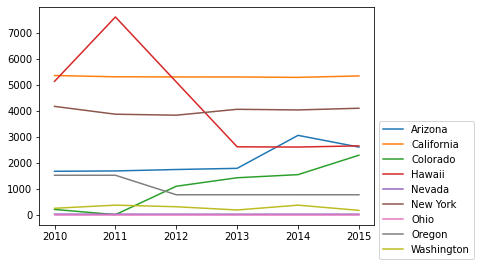

In [9]:
smaller_states = ['Arizona','California','Colorado','Hawaii','Nevada','New York','Ohio','Oregon','Washington']
state_graph(smaller_states)

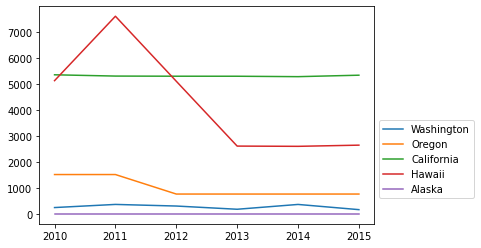

In [10]:
pacific = ['Washington','Oregon','California','Hawaii','Alaska']
state_graph(pacific)

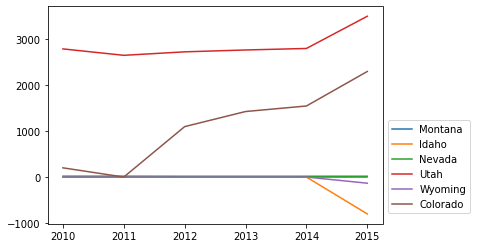

In [28]:
rockies = ['Montana','Idaho','Nevada','Utah','Wyoming','Colorado']
state_graph(rockies)

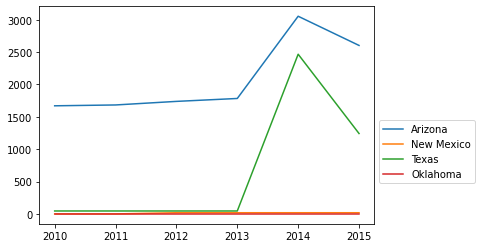

In [29]:
southwest = ['Arizona','New Mexico','Texas','Oklahoma']
state_graph(southwest)

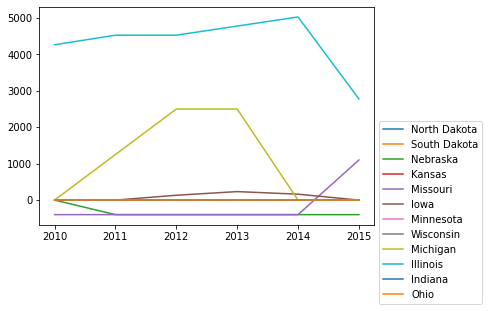

In [30]:
midwest = ['North Dakota','South Dakota','Nebraska','Kansas','Missouri','Iowa','Minnesota','Wisconsin'
           ,'Michigan','Illinois','Indiana','Ohio']
state_graph(midwest)

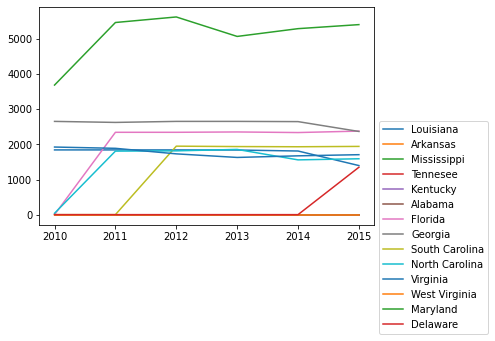

In [31]:
southeast= ['Louisiana','Arkansas','Mississippi','Tennesee','Kentucky','Alabama','Florida',
          'Georgia','South Carolina','North Carolina','Virginia','West Virginia','Maryland','Delaware']
state_graph(southeast)

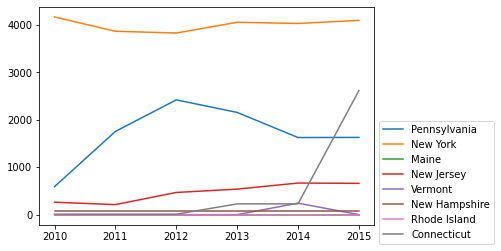

In [32]:
northeast = ['Pennsylvania','New York','Maine','New Jersey','Vermont','New Hampshire',
            'Rhode Island','Connecticut']
state_graph(northeast)